<a href="https://colab.research.google.com/github/siontama/Data-Science/blob/master/datascienceschool/iris%20plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

np.random.seed(0)
df.sample(frac=1).reset_index(drop=True).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.8,2.8,5.1,2.4,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.5,4.2,1.4,0.2,setosa
3,7.3,2.9,6.3,1.8,virginica
4,5.0,3.4,1.5,0.2,setosa
5,6.3,3.3,6.0,2.5,virginica
6,5.0,3.5,1.3,0.3,setosa
7,6.7,3.1,4.7,1.5,versicolor
8,6.8,2.8,4.8,1.4,versicolor
9,6.1,2.8,4.0,1.3,versicolor


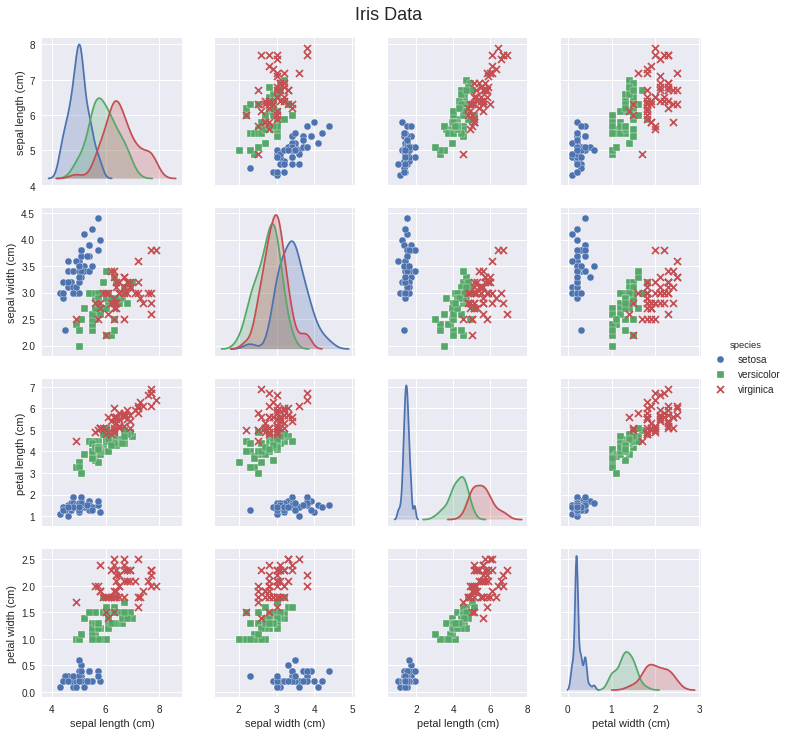

In [17]:
sns.pairplot(df, hue="species", diag_kind="kde", markers=["o", "s", "x"], diag_kws=dict(shade=True))
plt.suptitle("Iris Data", y=1.02, fontsize=18)
plt.show()

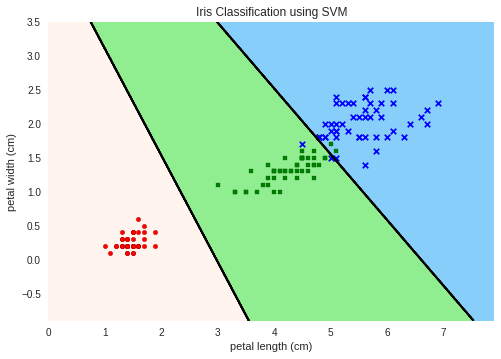

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib as mpl

features = [2, 3]
X = iris.data[:, features]
y = iris.target

model = SVC(kernel="linear", random_state=0)
model.fit(X, y)

XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() - 1
YY_max = X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                     np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

cmap = mpl.colors.ListedColormap(['seashell', 'lightgreen', 'lightskyblue'])
plt.contourf(XX, YY, ZZ, cmap=cmap)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=20,
            marker="o", edgecolors="darkred", facecolors="red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=20,
            marker="s", edgecolors="darkgreen", facecolors="green")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=30,
            marker="x", edgecolors="darkblue", facecolors="blue")
plt.xlim(XX_min, XX_max)
plt.ylim(YY_min, YY_max)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("Iris Classification using SVM")
plt.show()

In [28]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========